# Classifier methods, week 12 demo

## Libraries and settings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# Diabetes data

In [5]:
# National Institute of Diabetes and Digestive and Kidney Diseases 1988
# Source: J Smith et al, Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.
# All patients are females aged at least 21 years and of Pima Indian heritage (Arizona, USA).
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
dfo = pd.read_csv("data/diabetes.csv")
dfo.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1

In [6]:
dfo.Outcome.value_counts()
# target is categorical so Classifier methods will be used
# 0 = NOT diabetic; 1 = diabetic
# target unbalanced but not extremely so

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
dfo.dtypes.value_counts()
# features are all numeric so no need for label encoding 

int64      7
float64    2
Name: count, dtype: int64

In [8]:
dfo.isnull().values.any()
# no nulls so can be plotted simply

False

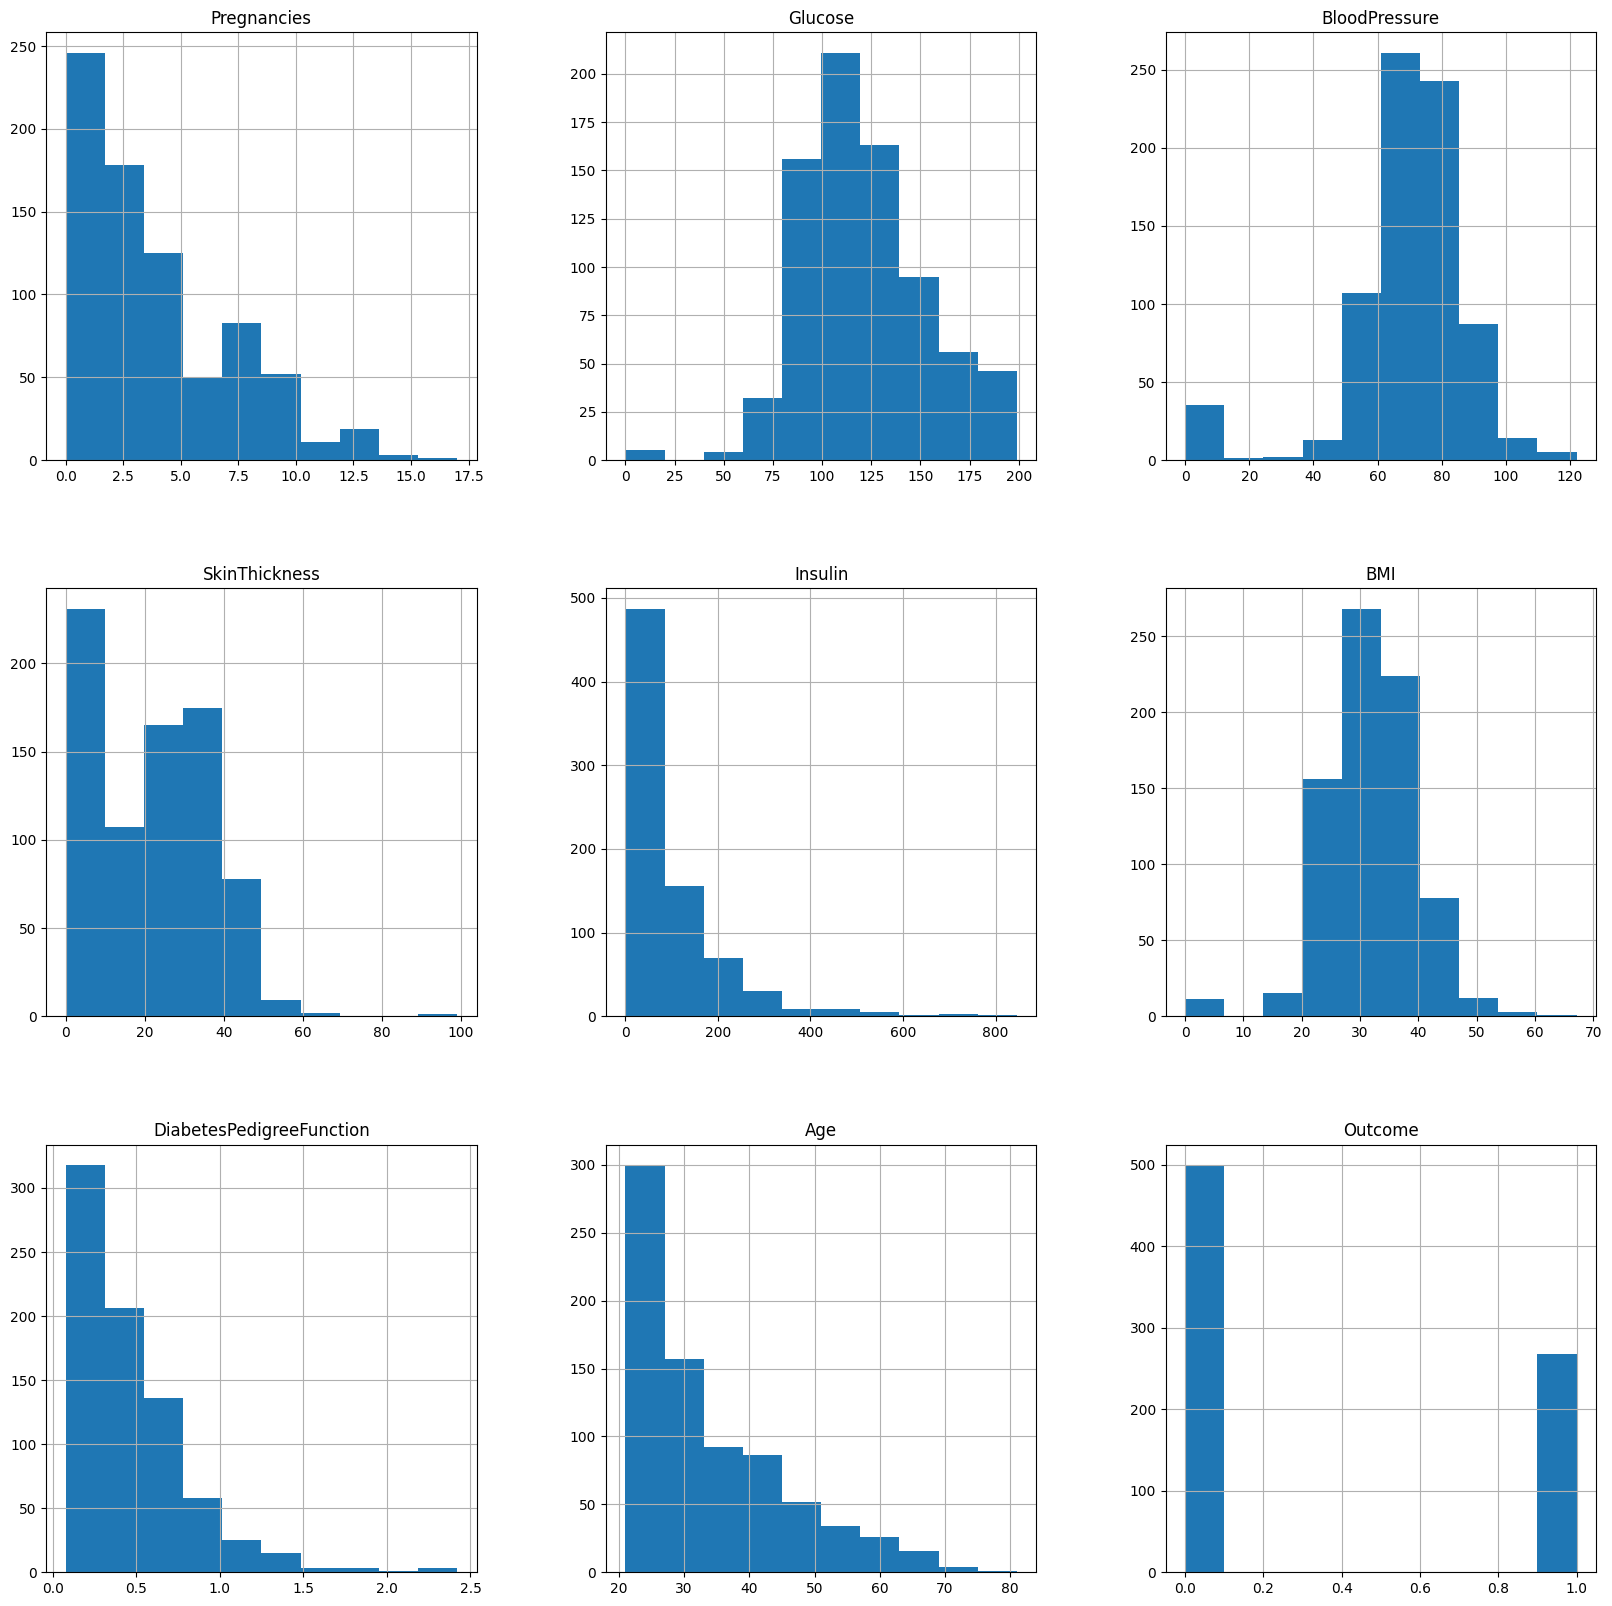

In [9]:
p = dfo.hist(figsize = (20,20))

In [10]:
(dfo == 0).sum()
# five features have nonsense zero values that should be nulls

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
# change those zeros to nulls
df = dfo.copy(deep=True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfo[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
# change Nulls to mean of column
# alternative would be to split rows by outcome 0/1 and use two means 
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [14]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230941                  0.137060   
BloodPressure             0.072517  0.281268                 -0.002763   
SkinThickness             0.158139  0.542398                  0.100966   
Insulin                   1.000000  0.166586                  0.098634   
BMI                       0.166586  1.000000                  0.153400   
DiabetesPedigreeFunction  0.098634  0.153400                  1.000000   
Age                       0.136734  0.025519                  0.033561   
Outcome                   0.214411  0.311924                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266534  0.492928  
BloodPressure             0.324595  0.166074  
SkinThickness             0.127872  0.215299  
Insulin                   0.136734  0.214411  
BMI                       0.025519  0.311924  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

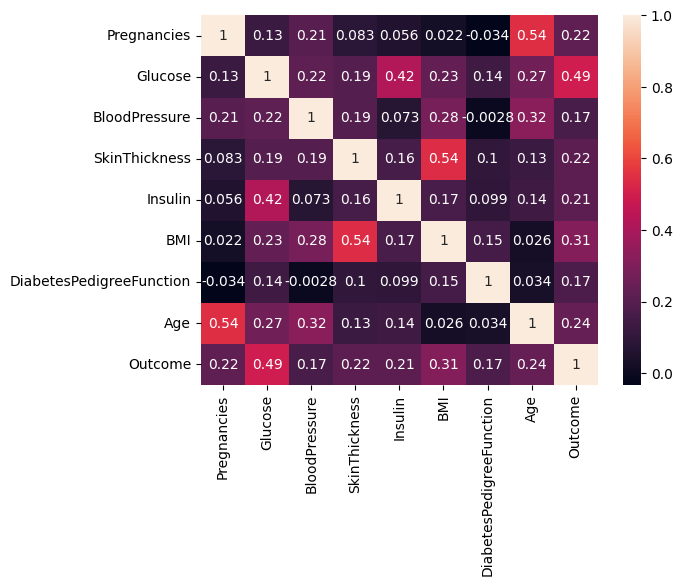

In [15]:
sns.heatmap(df.corr(), annot = True)
plt.show()
# Glucose and BMI have strong correlations with Outcome

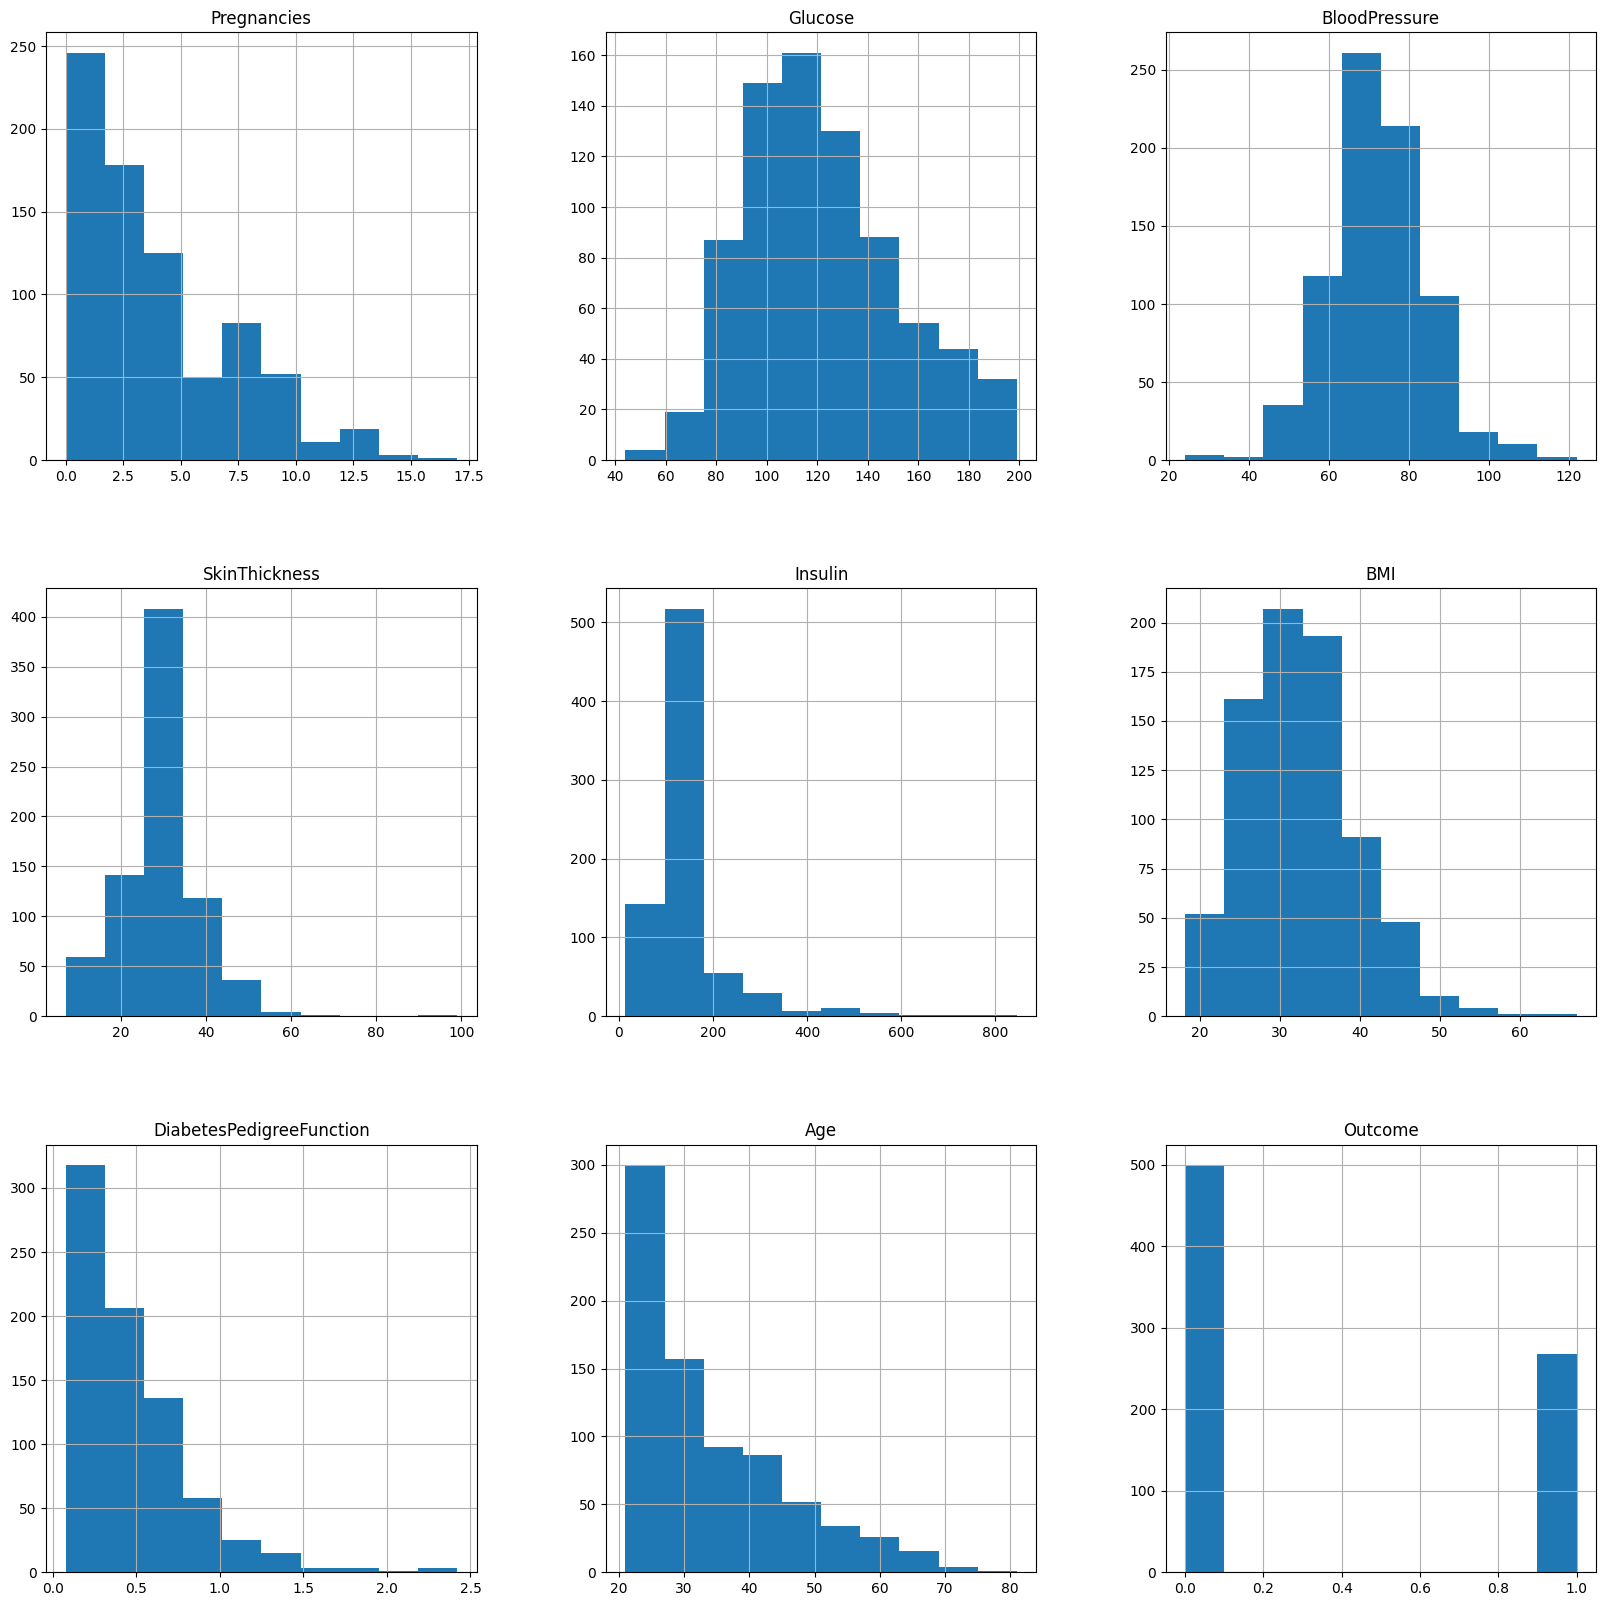

In [97]:
df.hist(figsize = (20,20))
plt.show()
# plot after zero/nulls changed to mean

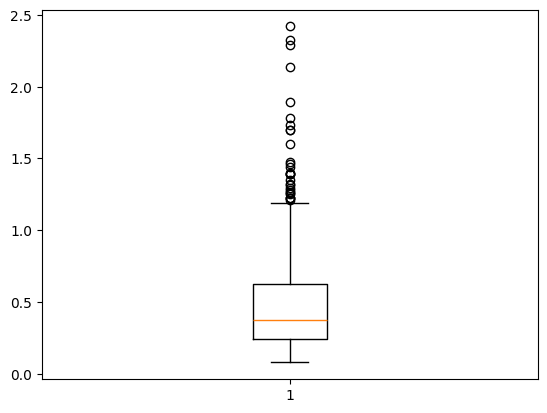

In [98]:
plt.boxplot(df.DiabetesPedigreeFunction)
plt.show() #no extreme outliers 

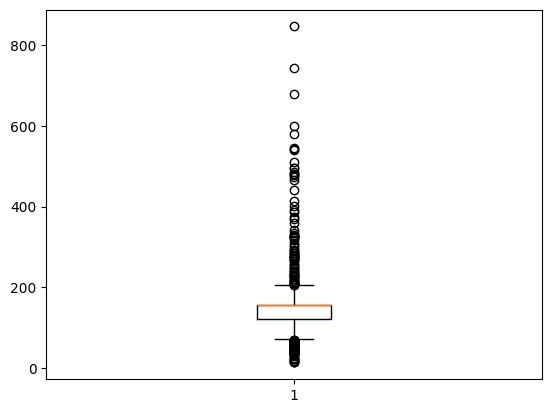

In [99]:
plt.boxplot(df.Insulin)
plt.show() # no extreme outliers

Outcome
0    500
1    268
Name: count, dtype: int64


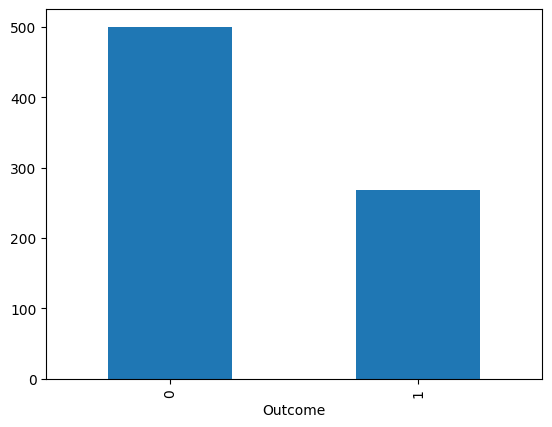

In [100]:
print(df.Outcome.value_counts())
figsize = (4,4)
df.Outcome.value_counts().plot(kind="bar")
plt.show()

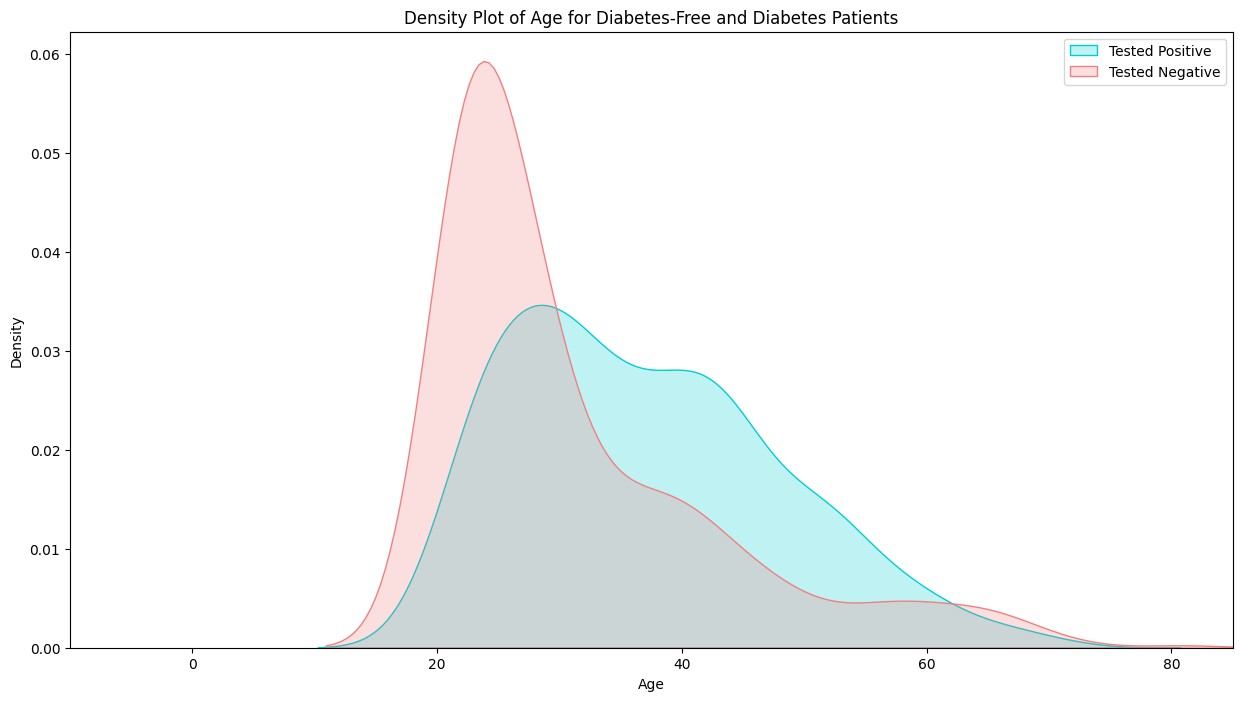

In [119]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Age"][df.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Tested Positive', 'Tested Negative'])
plt.title('Density Plot of Age for Diabetes-Free and Diabetes Patients')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## Prepare train & test data

In [16]:
X = df.drop('Outcome', axis=1)
y = df.Outcome
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [17]:
df_diabetes_zeros_to_mean = df.copy(deep=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled[0])

[-0.8514 -1.0575 -0.8280 -1.9231 -1.4019 -0.7698 0.3108 -0.7922]


In [20]:
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled[0])

[0.9605 1.2442 -0.6649 0.0076 0.0439 -0.7405 -0.5558 0.5610]


## Logistic Regression

In [21]:
model = LogisticRegression(C=0.01, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200)

In [22]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test_scaled)[:,1]

In [23]:
print("%.4f" % log_loss(y_test, y_pred))

10.5322


In [29]:
# top row = dataquest Dec 2-23really negative TN/FP -- bottom = really positive FN/TP 
print(confusion_matrix(y_test, y_pred))
print(y_test.value_counts())

[[80 20]
 [25 29]]
Outcome
0    100
1     54
Name: count, dtype: int64


In [25]:
print("%.4f" % accuracy_score(y_test, y_pred))

0.7078


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



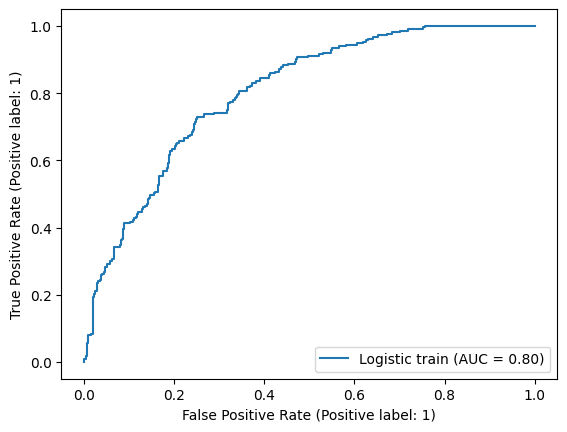

In [66]:
RocCurveDisplay.from_predictions(y_train, model.predict_proba(X_train_scaled)[:,1], name="Logistic train")  
plt.show()  

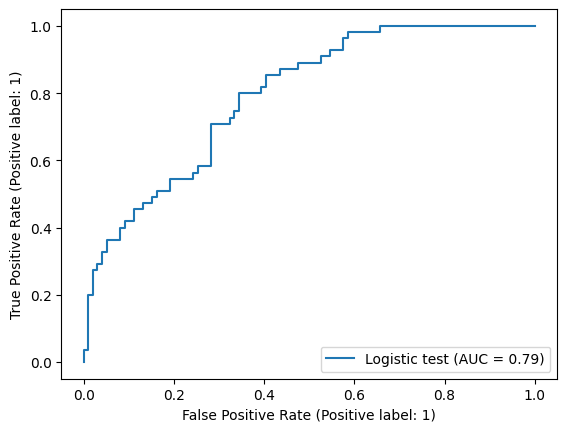

In [67]:
RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test_scaled)[:,1], name="Logistic test")  
plt.show()  

### Model 2 - L1, Saga, C=0.1 

In [68]:
model2 = LogisticRegression(C=0.1, penalty="l1", solver="saga", max_iter=2000)
model2.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=2000, penalty='l1', solver='saga')

In [69]:
y_pred = model2.predict(X_test_scaled)
y_prob = model2.predict_proba(X_test_scaled)[:,1]

In [71]:
print("%.4f" % log_loss(y_test, y_pred))

11.0003


In [72]:
confusion_matrix(y_test, y_pred)

array([[81, 18],
       [29, 26]])

In [73]:
print("%.4f" % accuracy_score(y_test, y_pred))

0.6948


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        99
           1       0.59      0.47      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



In [77]:
print("%.4f" % roc_auc_score(y_test, y_prob))
# worse than first model

0.6815


In [78]:
# practice saving a model
from joblib import dump, load
dump(model, "logistic_model_1.joblib")

['logistic_model_1.joblib']

### Mitigate unbalanced target

In [171]:
model3 = LogisticRegression(C=0.01, class_weight='balanced')
model3.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced')

In [172]:
y_pred = model3.predict(X_test_scaled)
y_prob = model3.predict_proba(X_test_scaled)[:,1]

In [174]:
# balanced class weight improves AUROC 
print("%.4f" % roc_auc_score(y_test, y_prob))

0.7774


In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



In [176]:
# but fails to find any Positive outcomes
confusion_matrix(y_test, y_pred)

array([[100,   0],
       [ 54,   0]])

In [ ]:
# abandon effort to use SMOTE 

In [129]:
from imblearn.over_sampling import SMOTE
model_sm = SMOTE(random_state=42)

X_sm, os_data_y = model_sm.fit_resample(X_train_scaled, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=X.columns)
os_data_y = pd.DataFrame(data=os_data_y.ravel(), columns=['Outcome'])

# Printing the outcomes
print("length of oversampled data is ",len(os_data_X))
print("Number of positively tested in oversampled data",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==0]))
print("Number of negatively tested",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==1]))
print("Proportion of positively tested in oversampled data is ",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==0])/len(os_data_X))
print("Proportion of negatively tested in oversampled data is ",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==1])/len(os_data_X))


length of oversampled data is  800
Number of positively tested in oversampled data 400
Number of negatively tested 400
Proportion of positively tested in oversampled data is  0.5
Proportion of negatively tested in oversampled data is  0.5


### K-fold alone

In [152]:
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver='liblinear')

In [153]:
acc_score = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :],X.iloc[test_index, :]
    y_train, y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7467532467532467, 0.7012987012987013, 0.7597402597402597, 0.8235294117647058, 0.7647058823529411]
Avg accuracy : 0.7592055003819709


## Decision Tree Classifier

In [ ]:
# scaling not needed for decision tree

In [ ]:
# data refresh (df as feature names are needed)
# df = pd.read_csv("data/diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df.Outcome
# X = df.drop('Outcome', axis=1).to_numpy()
# y = df.Outcome.to_numpy() #.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
y_test.value_counts()
# nearly twice as many 0 as 1 (diabetes outcome)

Outcome
0    100
1     54
Name: count, dtype: int64

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_prob_train = model.predict_proba(X_train)[:, 1]
print(np.unique(y_prob_train, return_counts=True))
roc_auc_train = roc_auc_score(y_train, y_prob_train)
print(roc_auc_train)

(array([0.0000, 1.0000]), array([400, 214]))
1.0


In [33]:
# Training model was over-fitted because test AUROC is much lower
y_prob = model.predict_proba(X_test)[:, 1]
print(np.unique(y_prob, return_counts=True))
roc_auc = roc_auc_score(y_test, y_prob)
print("%.4f" % roc_auc)


(array([0.0000, 1.0000]), array([111,  43]))
0.6415


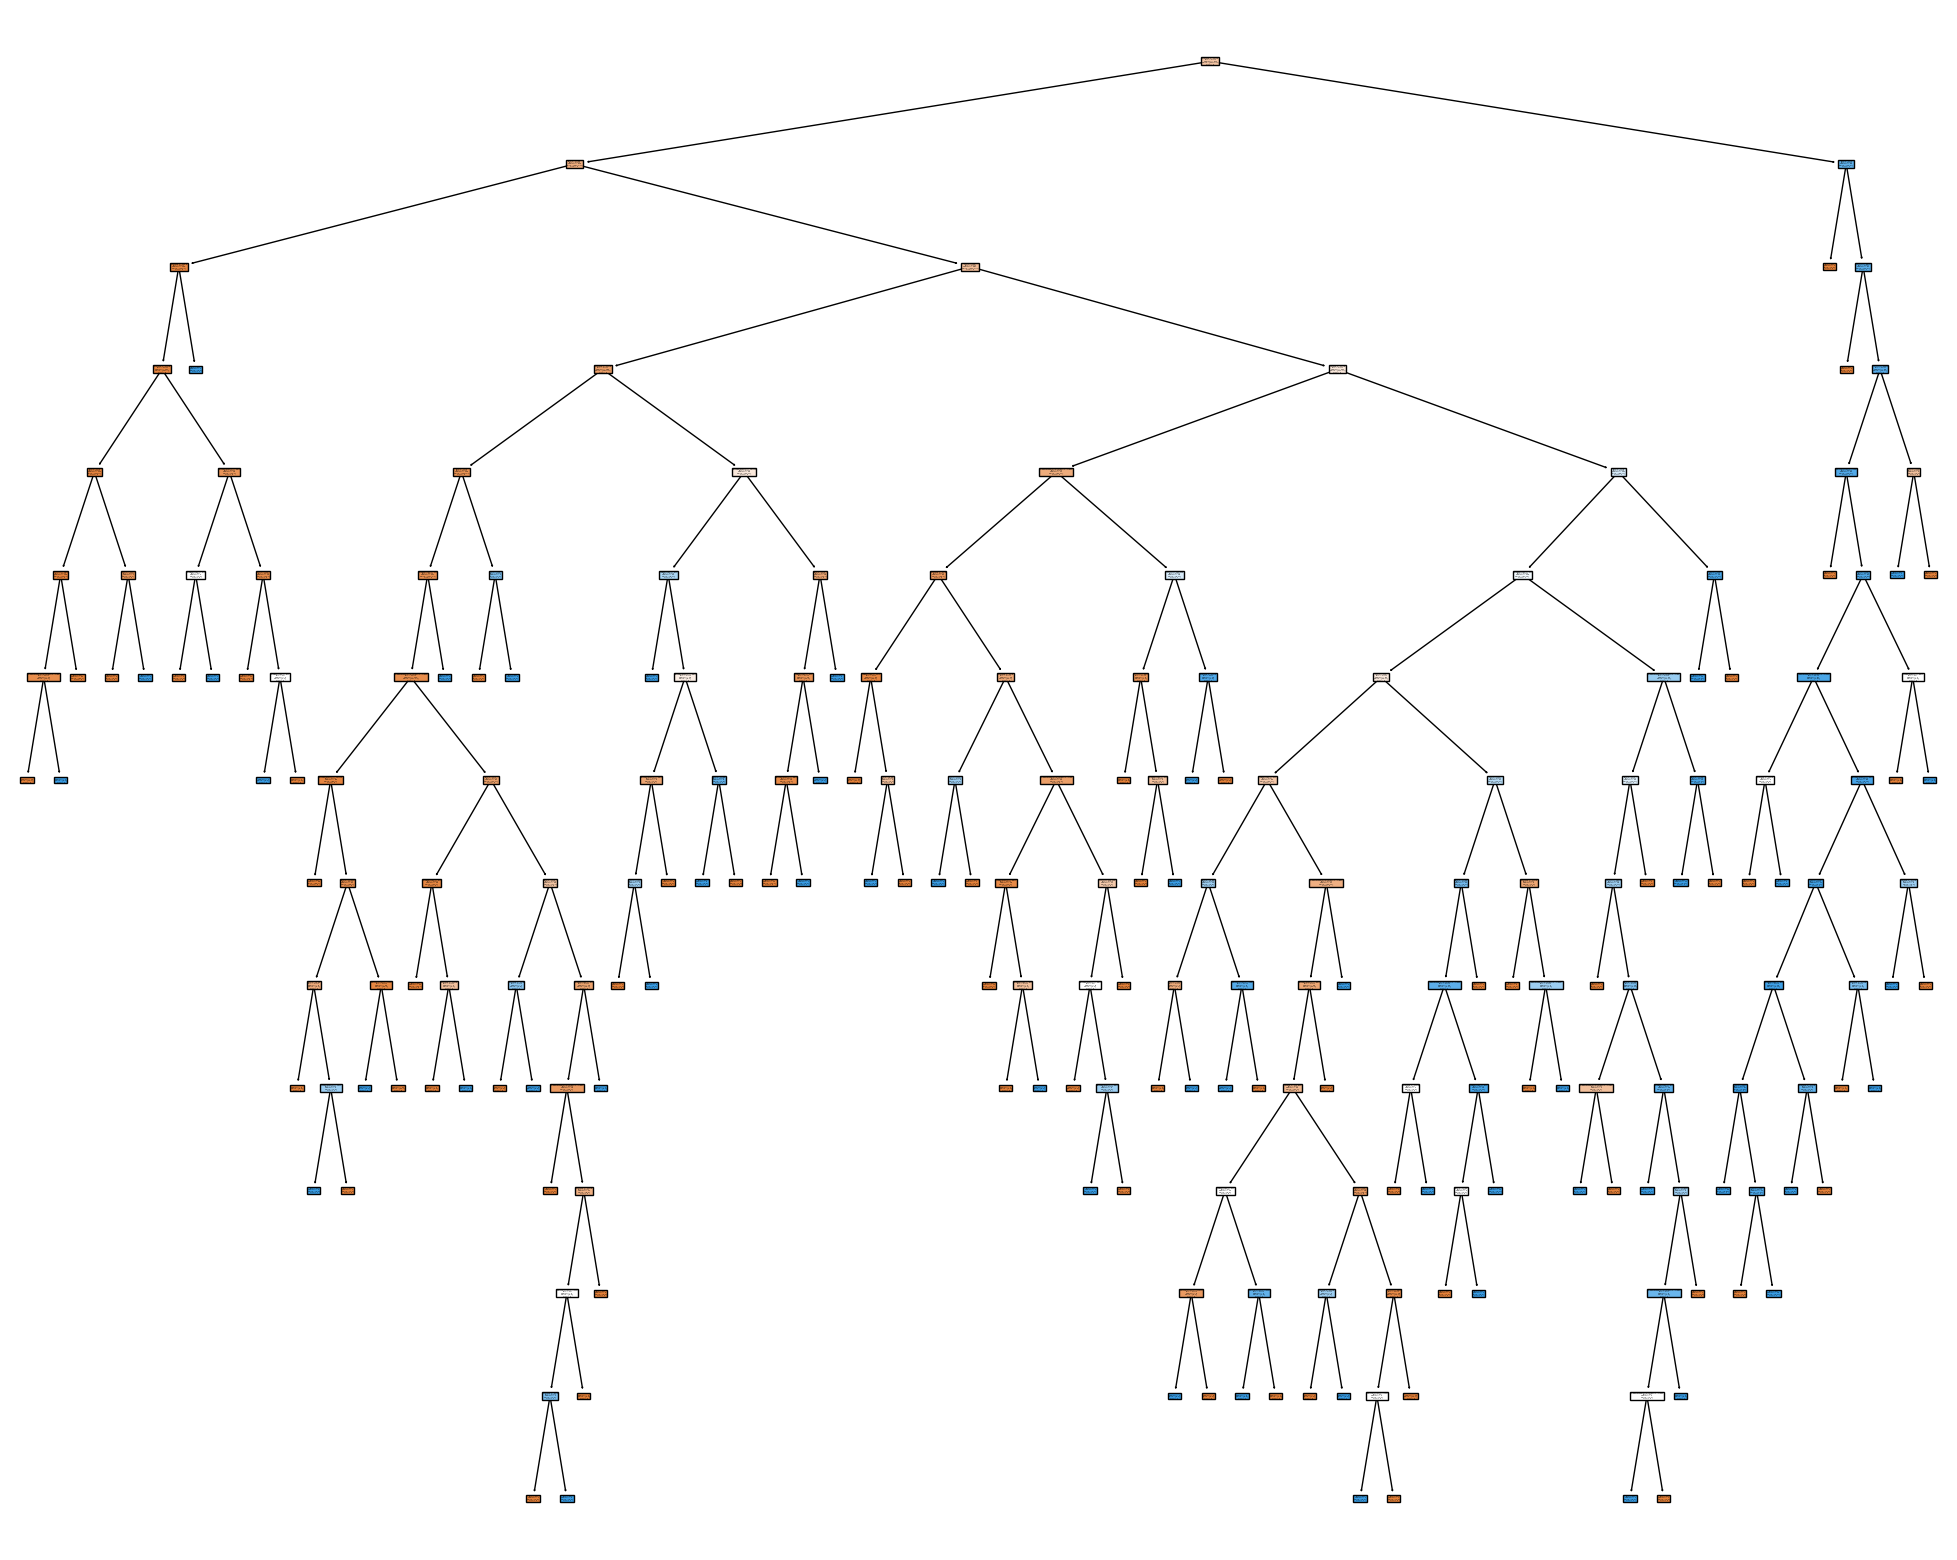

In [34]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names=['0','1'],
                   filled=True)

In [35]:
model.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [36]:
model.feature_importances_

array([0.0826, 0.3585, 0.0746, 0.0398, 0.0526, 0.1855, 0.0755, 0.1309])

<Axes: >

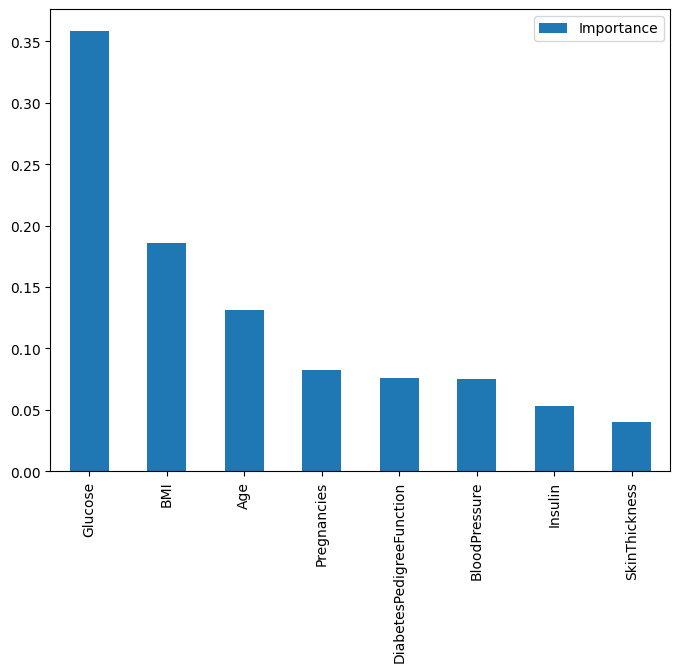

In [37]:
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
importances.plot(kind='bar', figsize=(8,6))

In [38]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[82 18]
 [29 25]]


### Tree-branching constrain to 2 levels 

In [39]:
model2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [40]:
y_prob = model2.predict_proba(X_test)[:, 1]
print(np.unique(y_prob, return_counts=True))

(array([0.0391, 0.3256, 0.8557]), array([39, 92, 23]))


In [41]:
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

0.7033333333333334


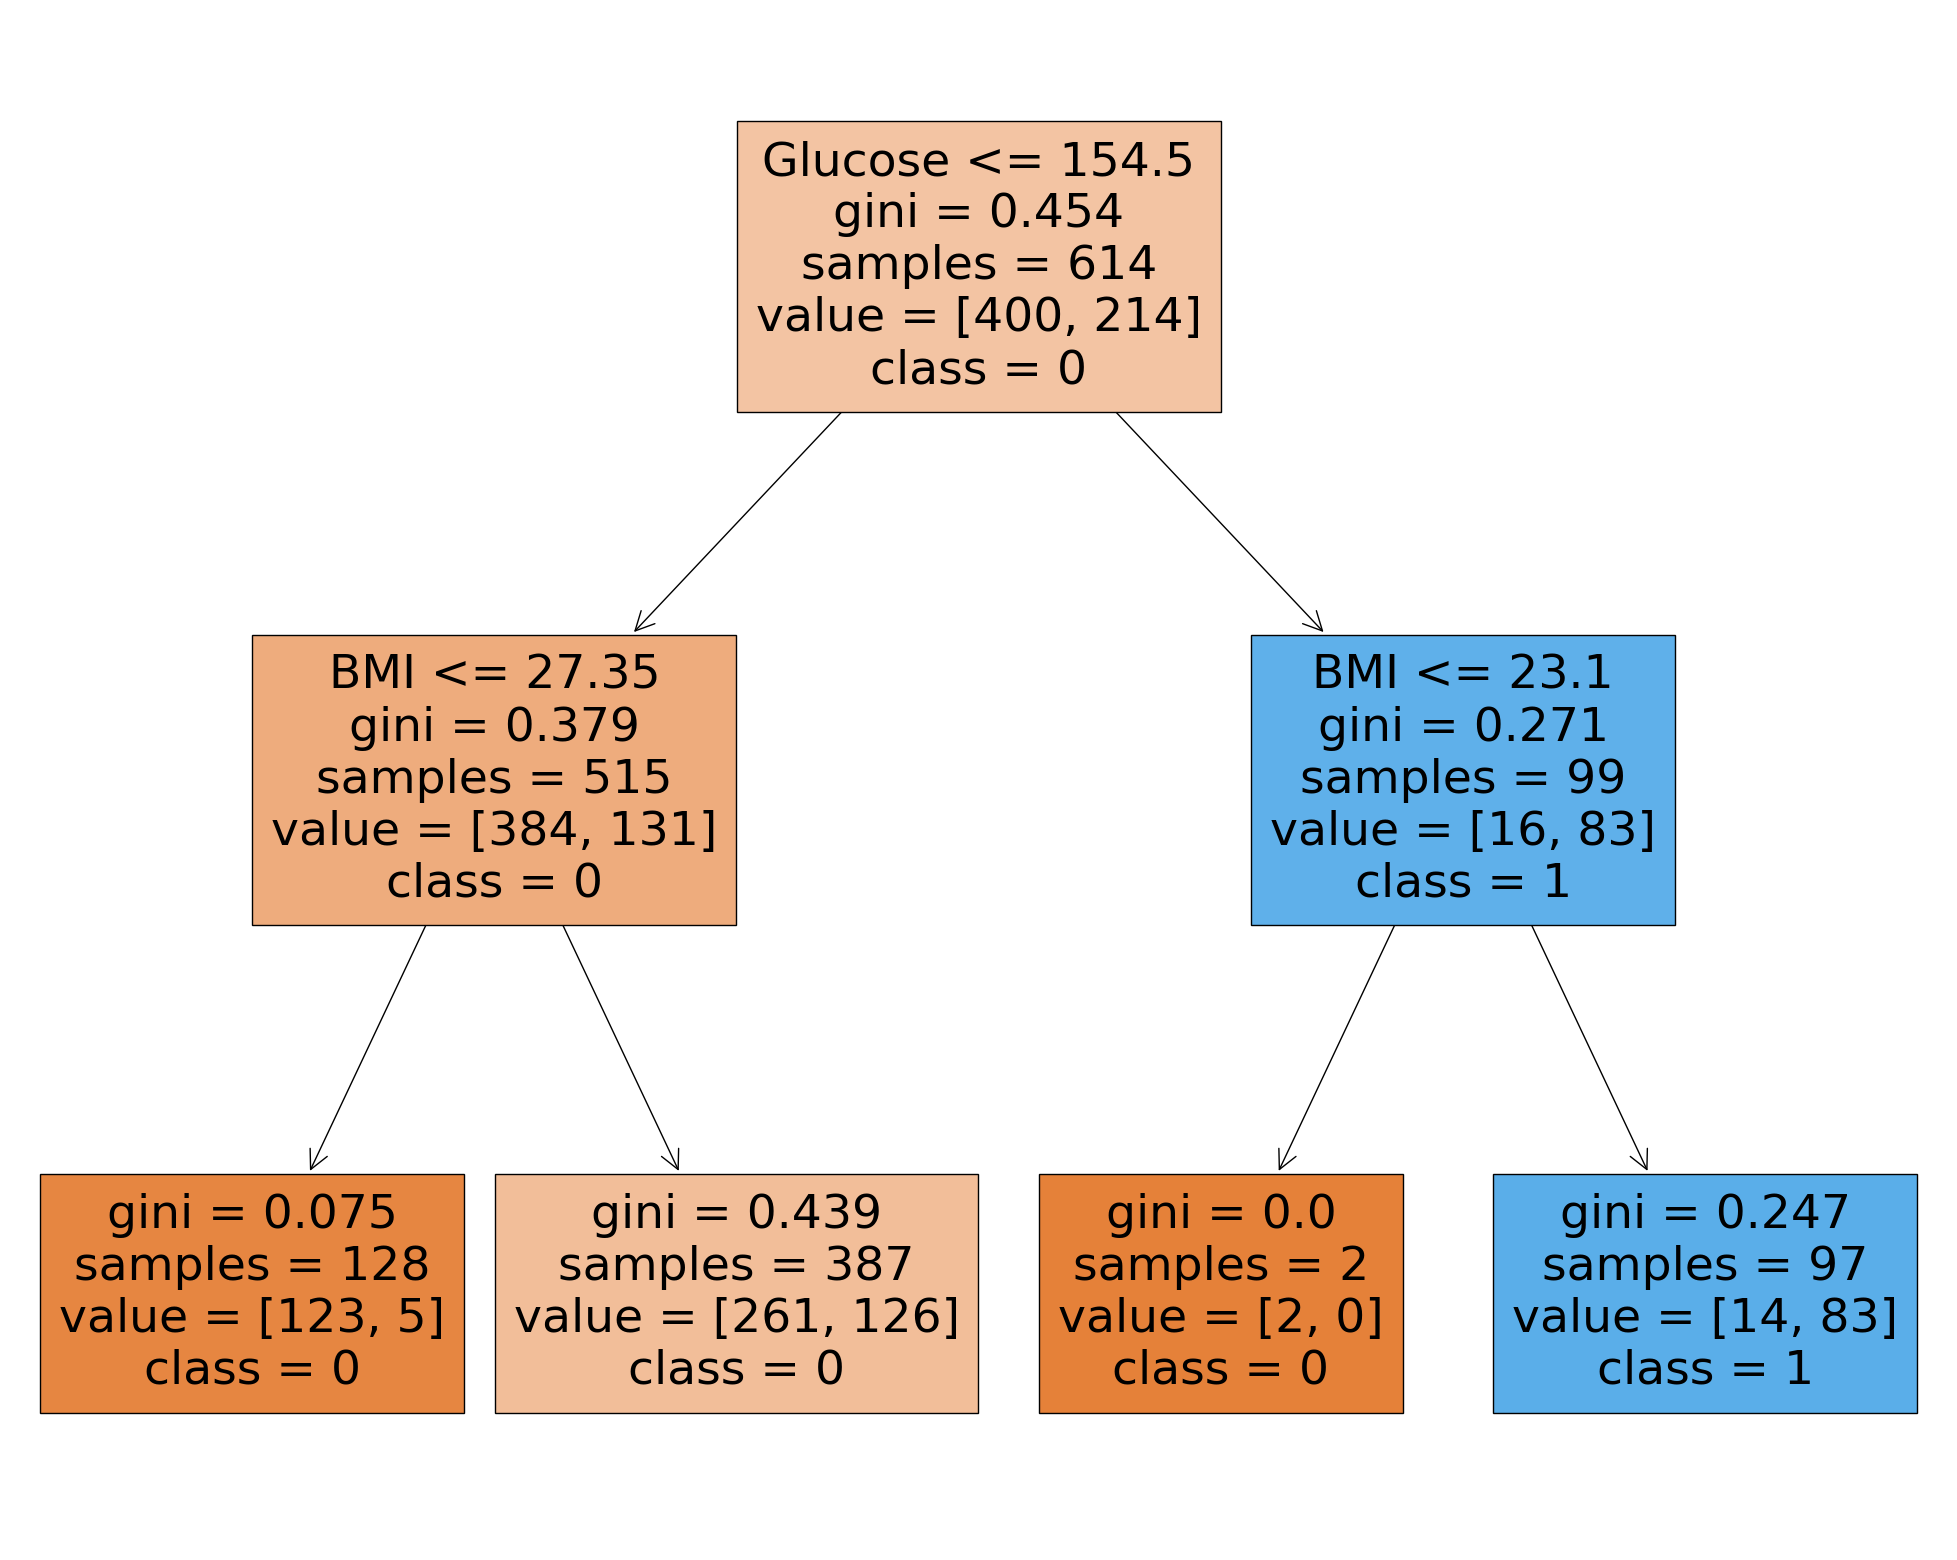

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model2, 
                   feature_names=df.columns,  
                   class_names=['0','1'],
                   filled=True)

In [43]:
print(model2.feature_names_in_)
model2.feature_importances_

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


array([0.0000, 0.7522, 0.0000, 0.0000, 0.0000, 0.2478, 0.0000, 0.0000])

<Axes: >

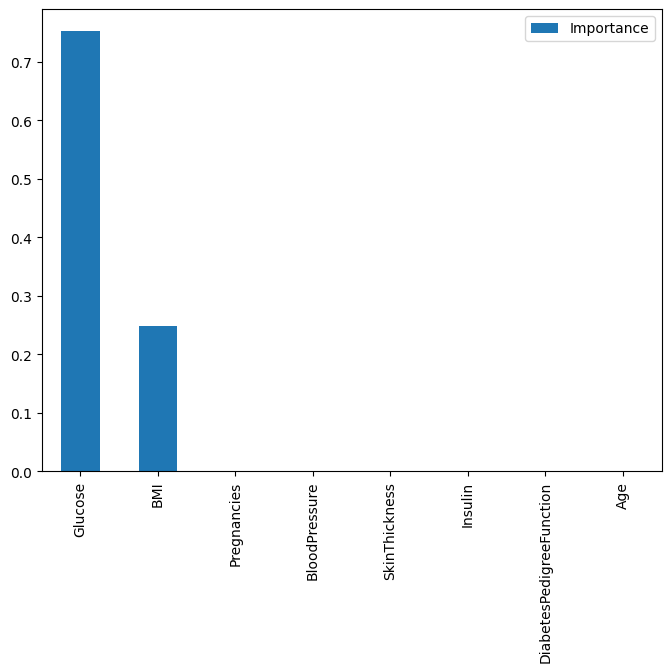

In [44]:
importances = pd.DataFrame(model2.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
importances.plot(kind='bar', figsize=(8,6))

In [45]:
y_pred = model2.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[92  8]
 [39 15]]


In [47]:
y_prob = model2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("%.4f" % roc_auc)

0.7033


## Random Forest - Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [52]:
model2.feature_importances_

array([0.0000, 0.7522, 0.0000, 0.0000, 0.0000, 0.2478, 0.0000, 0.0000])

In [50]:
# Forest does better than one tree
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)


(array([0.0000, 0.0250, 0.0500, 0.0750, 0.1000, 0.1250, 0.1500, 0.1750,
       0.2000, 0.2250, 0.2500, 0.2750, 0.3000, 0.3250, 0.3500, 0.3750,
       0.4000, 0.4250, 0.4500, 0.4750, 0.5000, 0.5250, 0.5500, 0.5750,
       0.6000, 0.6250, 0.6500, 0.6750, 0.7000, 0.7250, 0.7500, 0.7750,
       0.8000, 0.8250, 0.8500, 0.8750, 0.9000]), array([ 8, 17,  7,  9,  5,  5,  9,  3,  4,  2,  3,  1,  3,  3,  4,  4,  3,
        2,  2,  3,  5,  6,  6,  2,  3,  4,  4,  3,  3,  6,  2,  2,  3,  2,
        2,  2,  2]))


0.807037037037037

## Support Vector Classifier

In [ ]:
# some SV* kernels (notably rbf) do require X scaling

In [ ]:
# refresh data, split, scale, if required
# df = df_diabetes_zeros_to_mean
# X = df.drop('Outcome', axis=1)
# y = df.Outcome
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [53]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [54]:
# nearly as good as RF
y_prob = model.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_prob)

0.7910185185185186

In [55]:
y_pred = model.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)

array([[84, 16],
       [25, 29]])

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



### hyperparameter tuning for SVC

In [58]:
# small improvement with lower Gamma
model2 = SVC(kernel='rbf', probability=True, gamma=0.01)
model2.fit(X_train_scaled, y_train)
y_prob = model2.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_prob)

0.8070370370370371

In [59]:
y_pred = model2.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)

array([[85, 15],
       [29, 25]])

In [60]:
model3 = SVC(kernel='poly', degree=5, probability=True)
model3.fit(X_train_scaled, y_train)
y_prob = model3.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_prob)
# worse AUROC with polynomial SVC

0.769074074074074

In [61]:
y_pred = model3.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
# increases false Negatives but decreases false Positives, with polynomial SVC

array([[89, 11],
       [36, 18]])

### Limit to 2 features, for plotting

In [62]:
X2 = df[['Glucose','BMI']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [63]:
from mlxtend.plotting import plot_decision_regions

In [64]:
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report

In [65]:
model = SVC(kernel='linear', probability=True)
model.fit(X2_train_scaled, y_train)

SVC(kernel='linear', probability=True)

<Axes: >

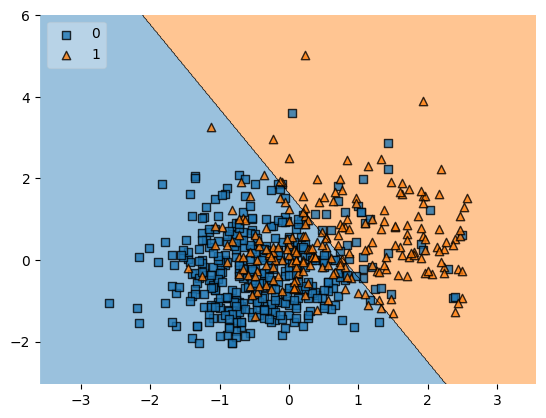

In [66]:
plot_decision_regions(X2_train_scaled, y_train.astype(int).values, clf=model, legend=2)

<Axes: >

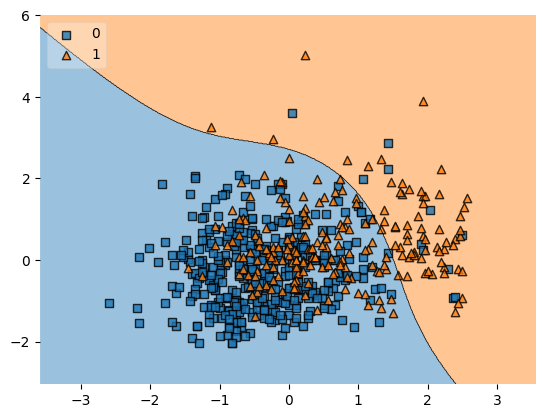

In [67]:
model = SVC(kernel='poly', degree=3, probability=True)
model.fit(X2_train_scaled, y_train)
plot_decision_regions(X2_train_scaled, y_train.astype(int).values, clf=model, legend=2)

<Axes: >

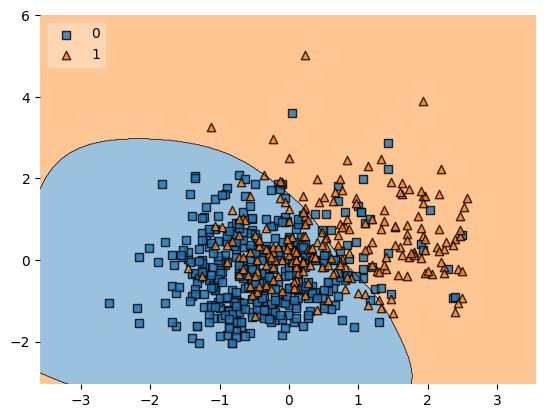

In [68]:
model = SVC(kernel='rbf', probability=True)
model.fit(X2_train_scaled, y_train)
plot_decision_regions(X2_train_scaled, y_train.astype(int).values, clf=model, legend=2)

In [69]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
            c='none', edgecolor='black', alpha=1.0,
            linewidth=1, marker='o',
            s=100, label='Test set')

## K-means clustering

## PCA pricipal components analysis

In [ ]:
# failed content below 

## K nearest neighbours Classifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 3
model = KNeighborsClassifier(k)
model.fit(X_train_scaled, y_train)
prob = model.predict_proba(X_train_scaled)[:,1]
prob

In [ ]:
train_scores = []
test_scores = []
train_prob = []
test_prob = []
for i in range(1,12):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))
    a = knn.predict_proba(X_train_scaled)[:,1]
    e = knn.predict_proba(X_test_scaled)[:,1]

    print(e)
    train_prob.append(a)
    test_prob.append(e)

In [144]:
print(max(train_scores))
print(max(test_scores))

1.0
0.7727272727272727


In [148]:
print(train_scores)

[1.0, 0.8452768729641694, 0.8485342019543974, 0.8208469055374593, 0.8355048859934854, 0.8110749185667753, 0.8257328990228013, 0.8127035830618893, 0.8159609120521173, 0.7964169381107492, 0.8078175895765473]


In [145]:
print(max(train_prob))
print(max(test_prob))

# Cross-Validation

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()